# 2024-11-19 Cnb Counts

**Purpose:** Desperately trying to retain what little sanity I have left

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re
from scipy.stats import chisquare

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure6'

In [3]:
ls

2024-11-19 Cnb counts.ipynb        figs/
2024-12-05 Cnb Figure Plots.ipynb  output/
data/


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure6'
data_dir = home_dir + '/data/'
figs_dir = home_dir + '/figs/'
outs_dir = home_dir + '/output/'

In [5]:
# reading in data
os.chdir(data_dir)
data = pd.read_excel('Cnb counts.xlsx')
data

,Nb,genotype,description,bin,frame,GFP background,CS1 GFP,CS1 GFP sub,CS2 GFP,CS2 GFP sub,Cyto GFP,Cyto GFP sub,RAW CS1/Cyto GFP,RAW CS2/Cyto GFP,CS1/Cyto GFP,CS2/Cyto GFP
0,PP4KO 1,PP4KO,recruits Cnb after division.,1X Cnb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PP4KO 2,PP4KO,"loses MTOC, looks like there are 2 points of C...",2X Cnb,81.0,20.0,35.5,15.5,41.5,21.5,25.2,5.2,1.408730,1.646825,2.980769,4.134615
2,PP4KO 3,PP4KO,recruits Cnb after division.,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
3,PP4KO 4,PP4KO,recruits Cnb after division.,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
4,PP4KO 6,PP4KO,NaN,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
5,PP4KO 7,PP4KO,"loses MTOC, no Cnb after it fades away.",0X Cnb,72.0,20.0,25.8,5.8,NaN,-20.0,25.9,5.9,0.996139,NaN,0.983051,NaN
6,PP4KO 10,PP4KO,NaN,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
7,PP4KO 11,PP4KO,NaN,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
8,PP4KO 12,PP4KO,NaN,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
9,PP4KO 13,PP4KO,NaN,1X Cnb,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
# using groupby to make summary table
# Calculate percentages
grouped_data = data.groupby(['genotype', 'bin']).size().reset_index(name='counts')
grouped_data['percentage'] = grouped_data.groupby('genotype')['counts'].transform(lambda x: (x / x.sum()) * 100)
grouped_data

,genotype,bin,counts,percentage
0,PP4KO,0X Cnb,3,6.666667
1,PP4KO,1X Cnb,36,80.000000
2,PP4KO,2X Cnb,6,13.333333
3,WT,1X Cnb,10,100.000000


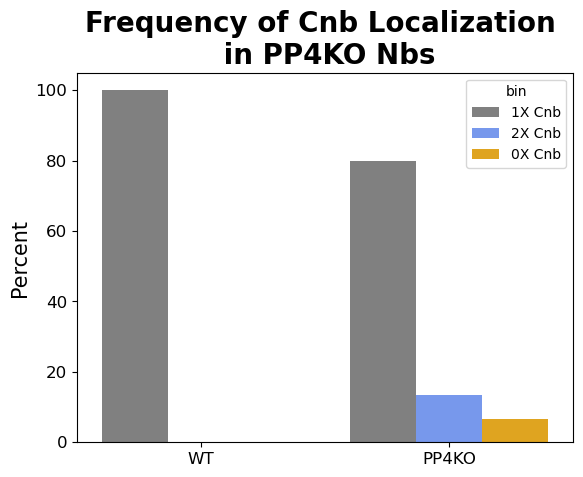

In [7]:
# plotting
p = ['grey', '#648FFF', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness
sns.barplot(x = 'genotype', y = 'percentage', data = grouped_data, 
           hue = 'bin', palette = p,
           order = ['WT', 'PP4KO'], hue_order = ['1X Cnb', '2X Cnb', '0X Cnb'])

plt.title('Frequency of Cnb Localization \n in PP4KO Nbs', fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('Percent', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('Cnb counts.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

# Cnb Count stats

In [8]:
import builtins
sum = builtins.sum

stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'test',
                                      'control n', 'experimental n',
                                     'test statistic', 'degrees of freedom', 'p-value'])
stats_table

,control variable,experimental variable,test,control n,experimental n,test statistic,degrees of freedom,p-value


In [9]:
# test# = control genotype, experimental genotype,
        # control percents, experimental counts, wt counts

t1 = ['WT', 'PP4KO', # genotypes
     0.98, 0.01, 0.01, # WT frequency
     3, 36, 6, # experimental counts
     20, 0, 0] # WT counts


tests = [t1]

In [10]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]

    observed = tests[i][5:8]  # extracts counts for experimental frequencies
    
    # WT distribution scaled to match total counts in the experimental condition
    wt_percent = tests[i][2:5]  # WT percentages 
    total_counts = sum(observed)  # Total counts in experimental condition
    expected = [p * total_counts for p in wt_percent]
    # Perform chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    
    stats_table.loc[i, 'control n'] = np.sum(tests[i][8:])
    stats_table.loc[i, 'experimental n'] = np.sum(tests[i][5:8])
    stats_table.loc[i, 'test statistic'] = chi2_stat
    stats_table.loc[i, 'p-value'] = p_value
    stats_table.loc[i, 'degrees of freedom'] = len(observed) - 1
    
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    elif p_value > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Chi^2 goodness of fit"
stats_table

,control variable,experimental variable,test,control n,experimental n,test statistic,degrees of freedom,p-value,significance
0,WT,PP4KO,Chi^2 goodness of fit,20,45,2915.204082,2,0.0,****


In [11]:
os.chdir(outs_dir)
stats_table.to_csv('cnb counts chi squared.csv')